In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('../dataset/Mall_Customers.csv')

In [3]:
raw_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
raw_data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
raw_data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
raw_data.shape

(200, 5)

In [7]:
df = raw_data.copy()

In [8]:
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

In [9]:
df = df.drop('CustomerID', axis=1)

In [10]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [11]:
df = df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'})

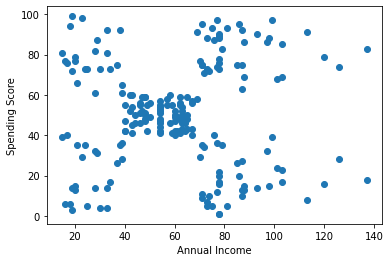

In [12]:
plt.scatter(df['Income'], df['Score'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [13]:
from scipy.stats import zscore

scaled_df = df.drop(['Gender', 'Age'], axis=1).apply(zscore)
scaled_df.describe()

,Income,Score
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


In [22]:
from scipy.spatial.distance import cdist

clusters = range(1, 25)
mean_dist = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    prediction = model.predict(scaled_df)
    
    mean_dist.append(sum(np.min(cdist(scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / scaled_df.shape[0])

In [23]:
mean_dist

[1.197935444974564,
 1.0527369402506686,
 0.7501916546715333,
 0.6351847618045524,
 0.5005663590363227,
 0.46542651029081505,
 0.43376940052842167,
 0.38459890380392503,
 0.3581961776540325,
 0.3370126598321857,
 0.3233518086922421,
 0.30254013304760446,
 0.29108647593629294,
 0.2817261468798451,
 0.26550952929288113,
 0.2525890725785267,
 0.24745966467997144,
 0.2379921217722784,
 0.2335689027867941,
 0.21824038733405526,
 0.2149133991630558,
 0.20587553359868493,
 0.2025686082940548,
 0.19568946147386285]

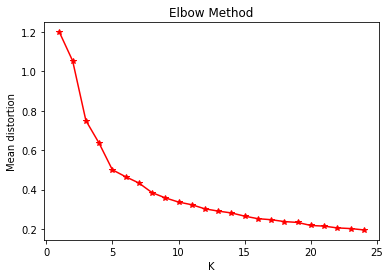

In [24]:
plt.plot(clusters, mean_dist, 'r*-')
plt.xlabel('K')
plt.ylabel('Mean distortion')
plt.title('Elbow Method')
plt.show()

In [25]:
f_model = KMeans(5)
f_model.fit(scaled_df)
prediction = f_model.predict(scaled_df)

In [26]:
prediction

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [27]:
df['cluster'] = prediction

In [28]:
df.head()

,Gender,Age,Income,Score,cluster
0,0,19,15,39,3
1,0,21,15,81,2
2,1,20,16,6,3
3,1,23,16,77,2
4,1,31,17,40,3


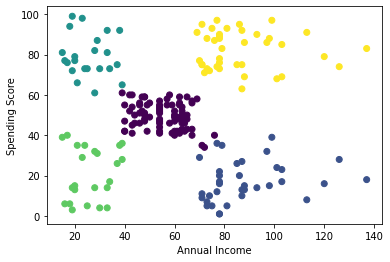

In [29]:
plt.scatter(df['Income'], df['Score'], c=df['cluster'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()